# Figuren maken in Python

## Overzicht

Het maken van figuren om je gegevens te visualiseren is een belangrijk onderdeel van veel onderzoeken. Er zijn haast oneindig veel mogelijkheden als het gaat om het maken van figuren, kijk bijvoorbeeld eens op deze website https://matplotlib.org/stable/gallery/index.html.  In dit deel van de cursus gaan we enkel een paar belangrijke basiselementen hiervan doornemen. Zo zullen we kijken naar het gebruik van kleuren, lijnen, symbolen, titels, labels, legenda's en tenslotte hoe je meerdere figuren kan combineren. Een ander veel voorkomend type figuur is een geografische kaart, dit kan zeker met Python (https://matplotlib.org/basemap/stable/users/examples.html) maar dit zal in deze cursus niet aan bod komen. 

Voor het maken van figuren in Python is de module `matplotlib.pyplot` de meest gebruikte. Deze zullen we hier ook gebruiken. 

# Lijn figuren

We werken weer verder met de jaarlijkse temperaturen voor de Bilt, waarvoor we in het vorige deel al een figuur hebben gemaaakt. Laten we die figuur nogmaals maken en enkele opties bekijken.

Text(0.5, 1.0, 'Temperatuurmetingen voor de Bilt, Nederland')

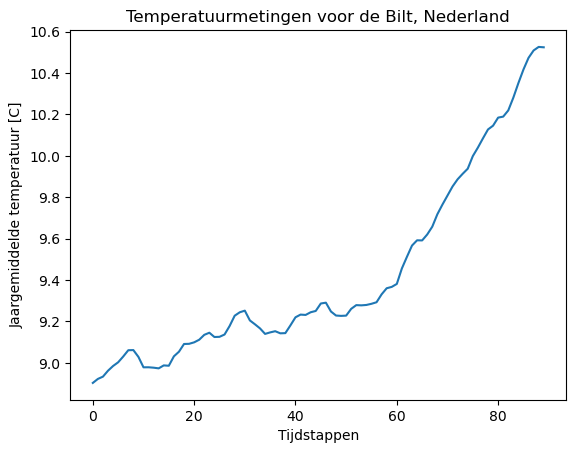

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data lezen
jaar, temp = np.loadtxt('Media/deBilt_yearly_temperatures.txt',comments='#',unpack=True)

# Figuur maken
plt.plot(temp)   # Maak een figuur met 'temp' als afhankelijke variabele op de y-as
plt.xlabel('Tijdstappen')   # Geef de x-ax een label
plt.ylabel('Jaargemiddelde temperatuur [C]')   # Geef de y-as een label
plt.title('Temperatuurmetingen voor de Bilt, Nederland')

Nu staan er 'tijdstappen' op de x-as in plaats van 'jaren'. Hiervoor kunnen we een onafhankelijke variabele toevoegen op de x-as door `plt.plot(jaar,temp)`. 

Ook kun je lijnkleuren aanpassen met de optie `color`, lijn type met `linestyle`, symbolen toevoegen met de optie `marker` en een legenda weergeven door zowel `label` als `plt.legend()` toe te voegen. Dat kan er dan bijvoorbeeld zo uit gaan zien:

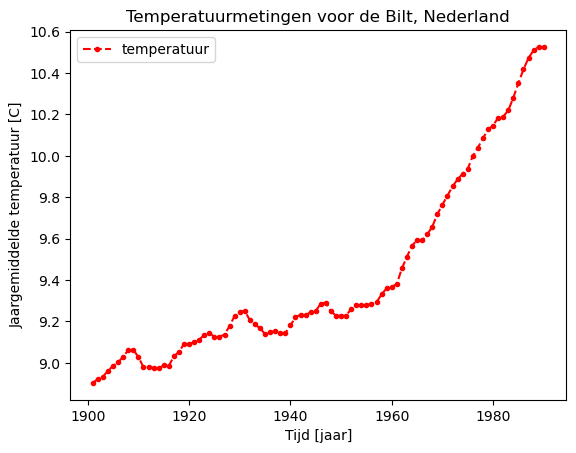

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data lezen
jaar, temp = np.loadtxt('Media/deBilt_yearly_temperatures.txt',comments='#',unpack=True)

# Figuur maken
plt.plot(jaar, temp, color='red', marker='.', linestyle='dashed', label='temperatuur') # temp op y-as, jaar op de x-as
plt.xlabel('Tijd [jaar]')   # Geef de x-ax een label
plt.ylabel('Jaargemiddelde temperatuur [C]')   # Geef de y-as een label
plt.title('Temperatuurmetingen voor de Bilt, Nederland')
plt.legend()

Een overzicht van alle `markers` kun je hier vinden: https://matplotlib.org/stable/api/markers_api.html.

Een overzicht van de `color` die je kunt gebruiken staat bijvoorbeeld hier: https://matplotlib.org/1.5.3/mpl_examples/color/named_colors.hires.png.

Een overzicht van alle `linestyle` opties kun je hier vinden: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html.

\
Als je meerdere reeksen in dezelfde plot wil zetten kun simpelweg twee keer achter elkaar `plt.plot()` gebruiken:

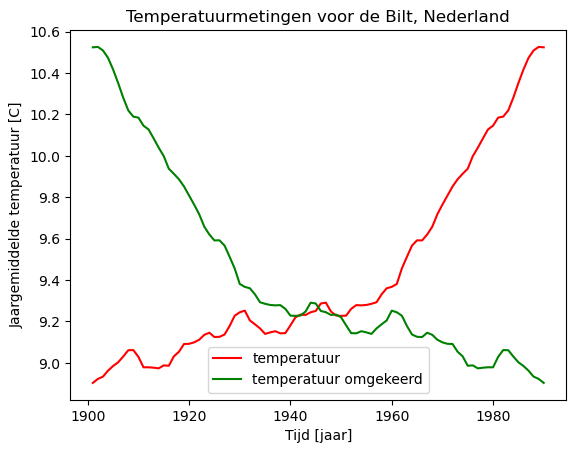

In [10]:
temp_reversed = temp[::-1] # Maak een nieuwe variabele waarin de temperaturen in omgekeerde volgorde staan

plt.plot(jaar, temp, color='red', label='temperatuur') # temp op y-as, jaar op de x-as
plt.plot(jaar, temp_reversed, color='green', label='temperatuur omgekeerd') # temp_reversed op y-as, jaar op de x-as
plt.xlabel('Tijd [jaar]')   # Geef de x-ax een label
plt.ylabel('Jaargemiddelde temperatuur [C]')   # Geef de y-as een label
plt.title('Temperatuurmetingen voor de Bilt, Nederland')
plt.legend()

Je kunt er ook voor kiezen om de twee reeksen in aparte figuren te zetten door gebruik te maken van `subplots`. Deze functie heeft als opties het aantal rijen, het aantal kolommen en tenslotte op welke plek je de huidige figuur wilt plaatsen:

Text(0.5, 1.0, 'Omgekeerde temperatuurreeks')

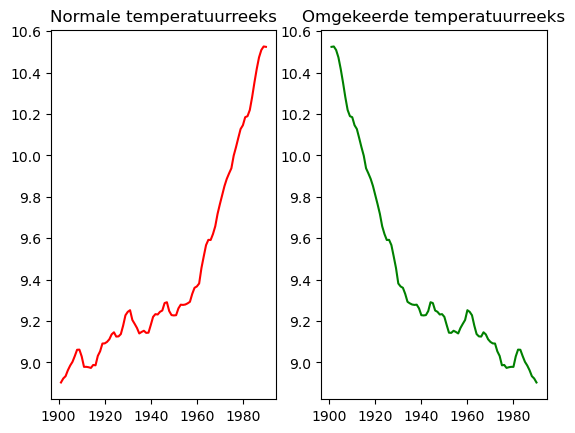

In [14]:
plt.subplot(1,2,1) # plot 1 rij, 2 kolommen en zet huidige figuur op plek 1
plt.plot(jaar, temp, color='red', label='temperatuur') # temp op y-as, jaar op de x-as
plt.title('Normale temperatuurreeks')
plt.subplot(1,2,2) # plot 1 rij, 2 kolommen en zet huidige figuur op plek 2
plt.plot(jaar, temp_reversed, color='green', label='temperatuur omgekeerd') # temp_reversed op y-as, jaar op de x-as
plt.title('Omgekeerde temperatuurreeks')

# Contour figuren

Om het maken van `contour plots` en `filled contour plots` te illustreren moeten we eerst een twee dimensionale variabele creeren.  dit voorbeeld  zullen we dat doen door gebruik te maken van sinus en cosinus.

<a list of 7 text.Text objects>

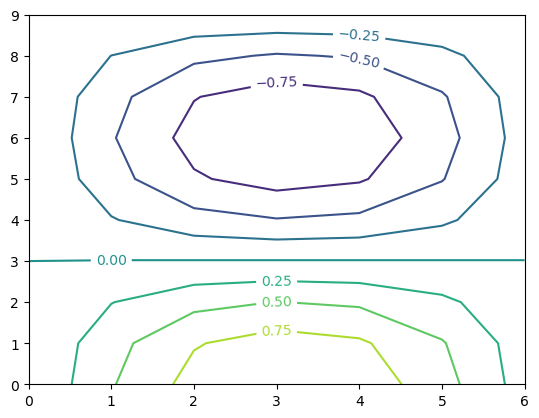

In [24]:
x, y = np.meshgrid(np.arange(7), np.arange(10)) # Maak een 2D array x en een 2D array y
z = np.sin(0.5 * x) * np.cos(0.52 * y) # gebruik de arrays x en y om z te berekenen.
# Let op: de twee regels hierboven hoef je niet te begrijpen!

CS = plt.contour(x,y,z) # contour figuur met x op de x-as, y op de y-as en z als afhankelijke variabele
plt.clabel(CS, fontsize=10) # Voeg contour labels toe. In dit geval moeten we gebruik maken van een variabele waarin we alle gegevens van de contour plot zetten (hier 'CS') zodat we vervolgens deze kunnen aanpassen met plt.clabel() 


Dezelfde data kunnen we ook weergeven in een `filled contour figuur`.

Text(0, 0.5, 'y')

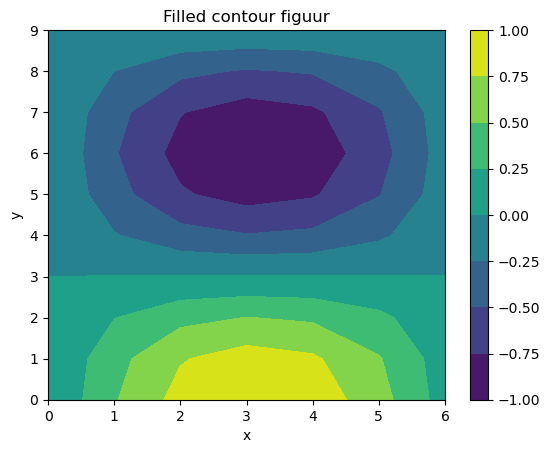

In [27]:
plt.contourf(x,y,z) # Maak filled contour figuur
plt.colorbar() # Geef de kleurenschaal weer
plt.title('Filled contour figuur')
plt.xlabel('x')
plt.ylabel('y')

Of je kunt de twee type contour figuren combineren:

<a list of 7 text.Text objects>

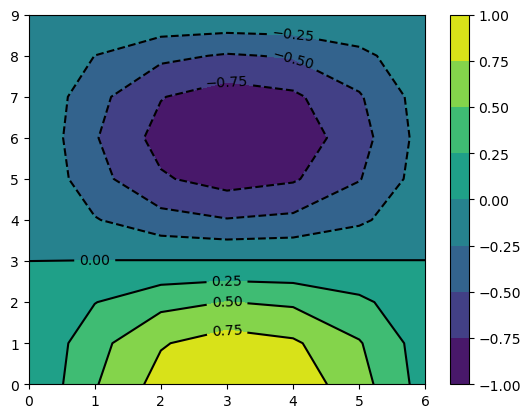

In [33]:
CS1 = plt.contourf(x,y,z) # Maak filled contour figuur met x op de x-as, y op de y-as en z als afhankelijke variabele
plt.colorbar(CS1) # Geef de kleurenschaal weer
CS2 = plt.contour(x,y,z, colors='black') # contour figuur met zwarte contourlijnen
plt.clabel(CS2, fontsize=10) # Voeg contour labels toe.

## Samenvatting

In dit deel heb je kort enkele voorbeelden gezien van hoe je figuren kan maken in Python. Je kunt bij de figuren nog veel meer toeters en bellen toevoegen en het zo complex maken als je wilt. Voor nu is het belangrijk dat je enkele basiselementen hebt gezien van lijnfiguren en contour figuren en hebt gezien hoe je meerdere figuren over elkaar of onder en/of naast elkaar kan maken.

<!-- Links -->
[Python_Numpy]: 07_Python_Numpy.ipynb

# Ga naar het volgende deel: [07_Python_Numpy][Python_Numpy]